## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, plot_roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/breast-cancer-wisconsin-data/data.csv


## Getting Know About Dataset

In [2]:
df  = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
#check diagnosis types count
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

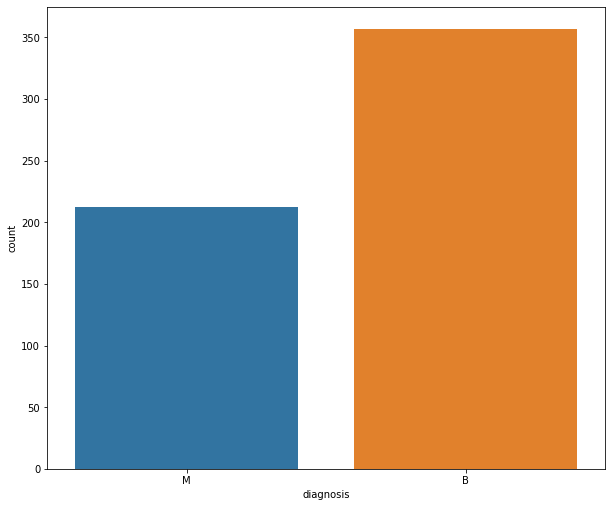

In [6]:
# Visualize how diagnosis distributed throghout the dataset'
plt.figure(figsize=(10,8.5))
sns.countplot(df['diagnosis'])
plt.show()

In [7]:
#drop unwanted columns
df.drop(['Unnamed: 32'],axis = 1,inplace=True)

In [8]:
#handle categorical variables
label = LabelEncoder()
df['diagnosis'] = label.fit_transform(df['diagnosis'])
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Correlation with each variables

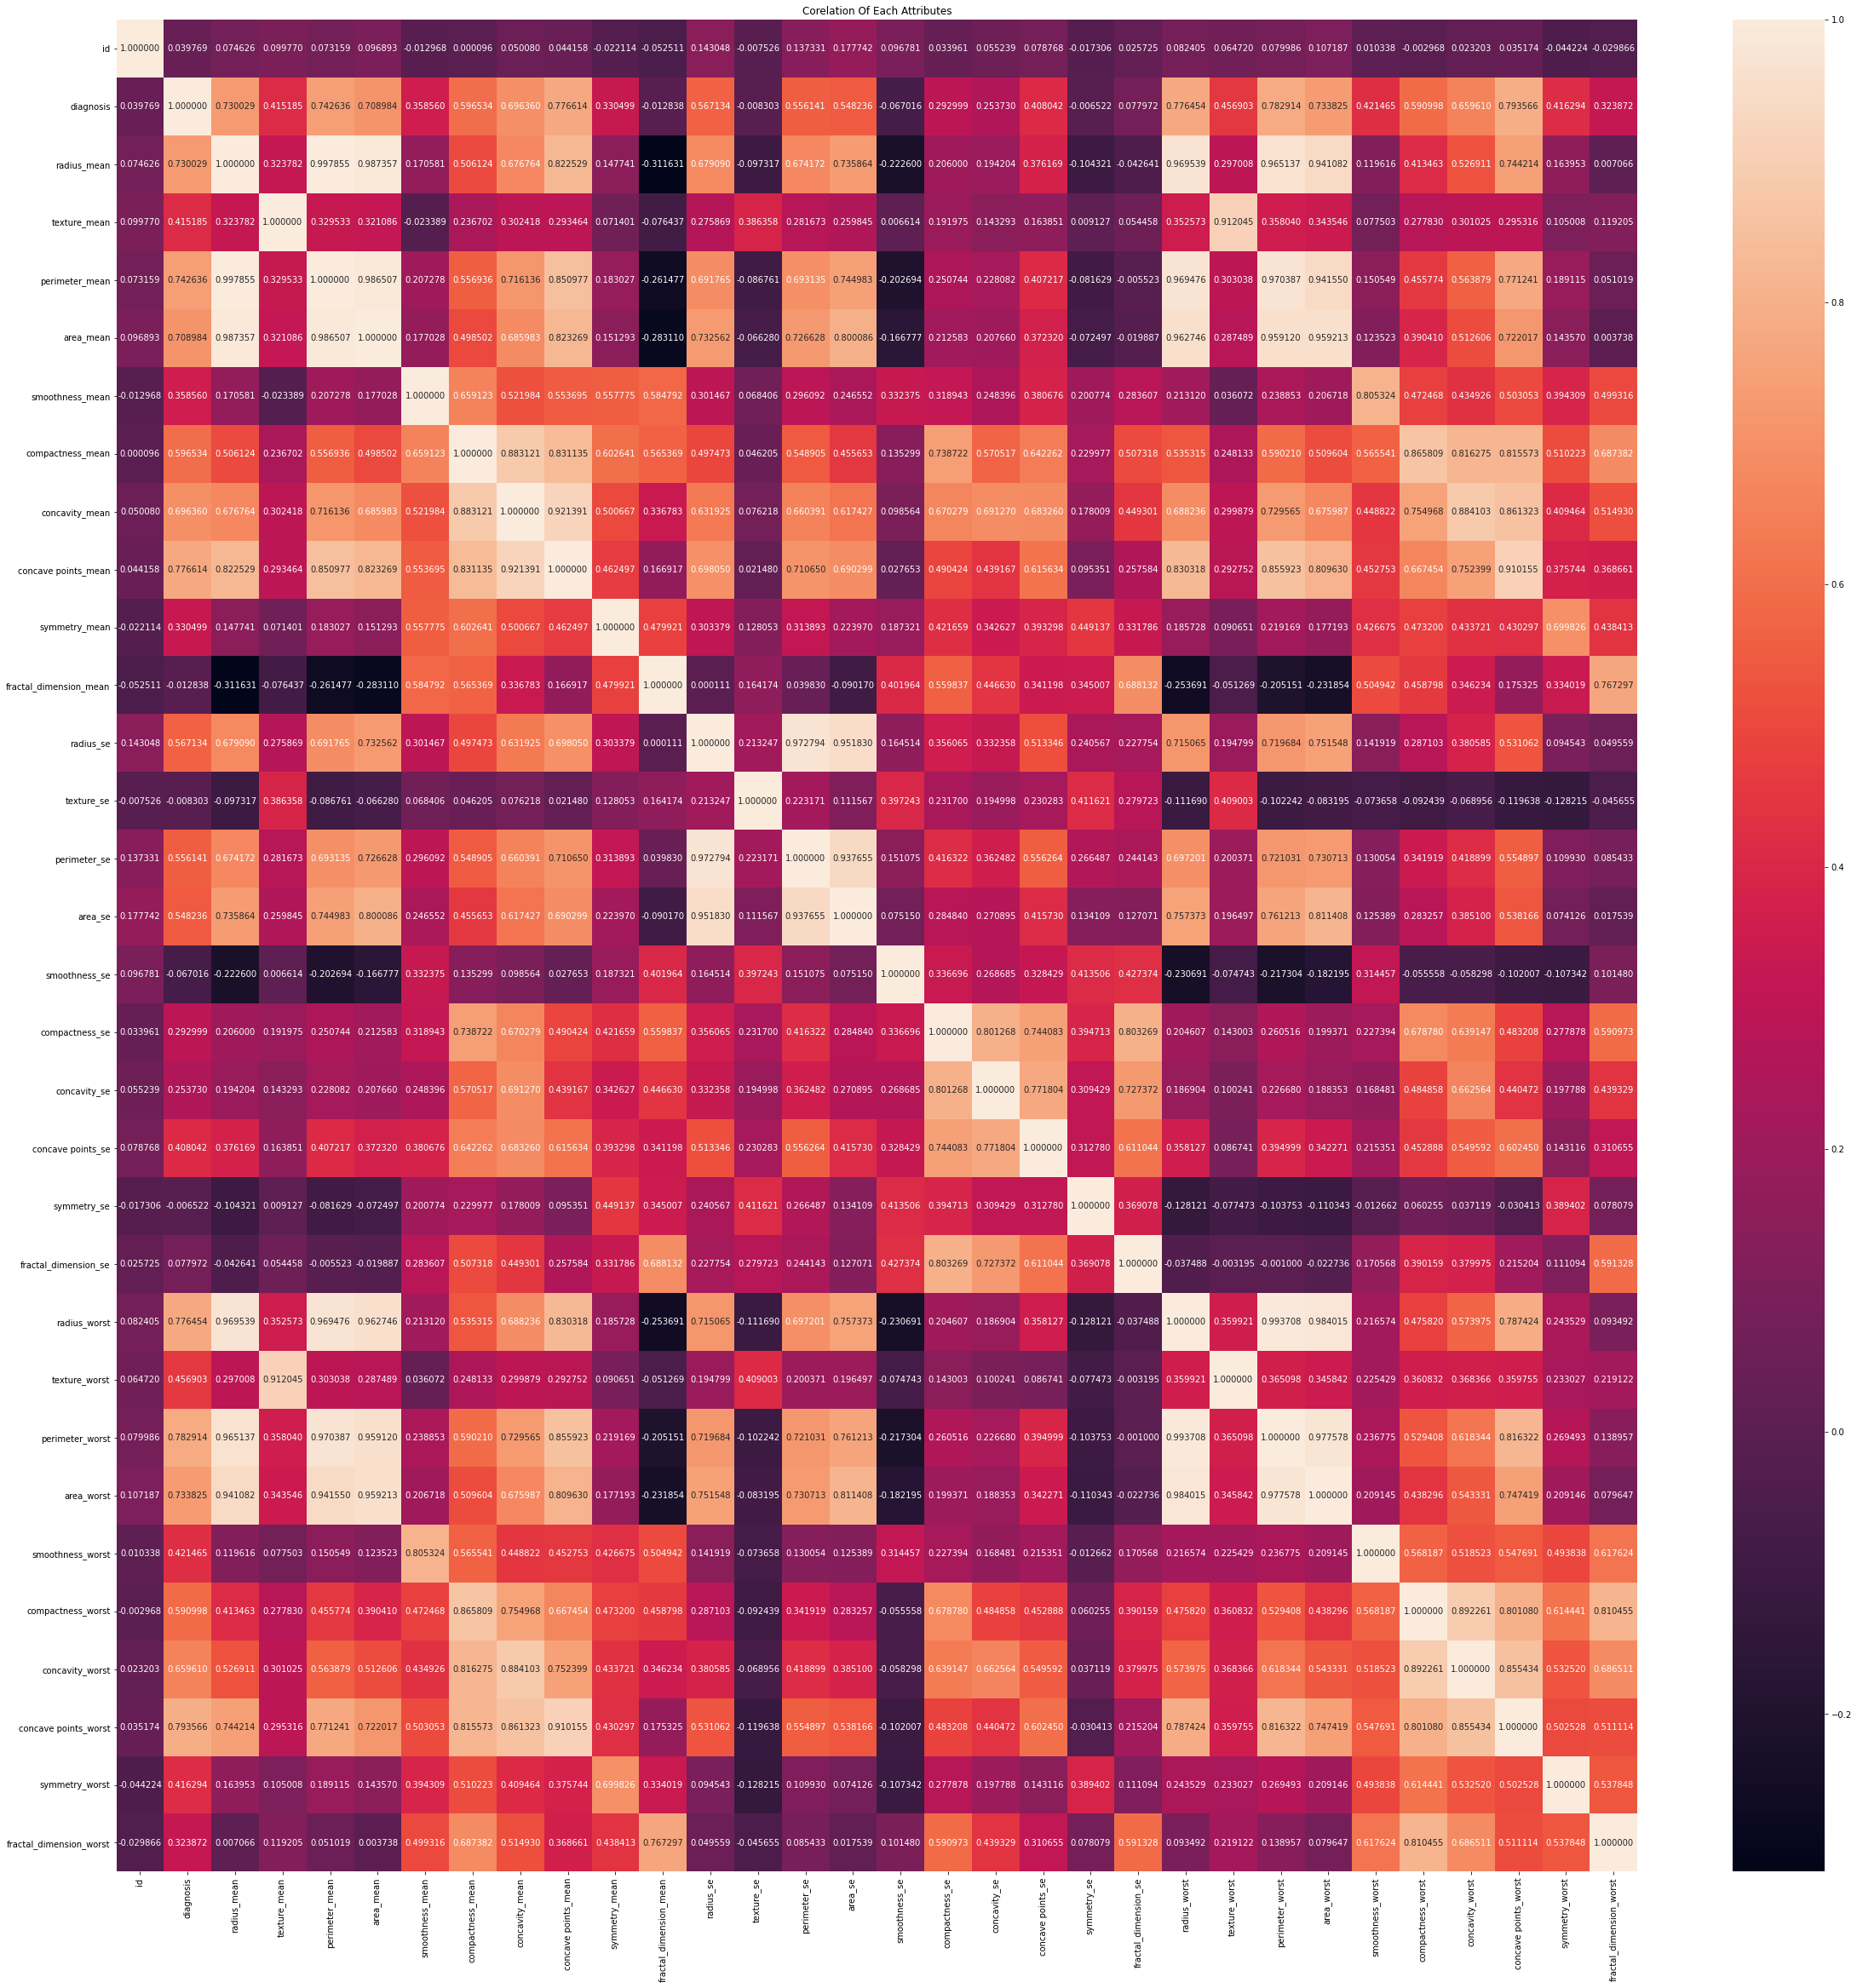

In [9]:
plt.subplots(figsize = (40,40))
sns.heatmap(df.corr(),annot=True,fmt="f").set_title("Corelation Of Each Attributes")
plt.show()

## Pre Processing 

In [10]:
x = df.drop(['diagnosis'],axis = 1)
y = df['diagnosis']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [12]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Model Bulding

In [27]:
#define functions for fit, & predict with each models
def models(mod,x_t,y_t,x_tes,y_tes,x_source,y_source):
    
    #Fit model
    mod.fit(x_t,y_t)
    
    #Predict Model
    pred = mod.predict(x_tes)
    
    #Accuracy Score
    accuracy = accuracy_score(y_tes,pred)
    
    #Cross Validation Score
    cross_validation = cross_val_score(mod,x_source,y_source,cv=5)
    print("Accuracy Is : ",accuracy*100,"%")
    
    print("-------------------------------------------")   
    
    print('Cross validations mean score ',round(np.mean(cross_validation)*100,4))
    
    print("-------------------------------------------")
    
    #Confusion Metrix
    print(confusion_matrix(y_tes, pred))
    
    print("-------------------------------------------")    
    
    #Recall Score , Percision Score, F1 Score
    print("Recall Score :",recall_score(y_tes, pred, average='weighted'))
    print("Percision Score :",precision_score(y_tes, pred, average='weighted'))
    print("F1 Score :",f1_score(y_tes, pred, average='weighted'))
    

## Logistic Regression Model

In [28]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

models(model,x_train,y_train,x_test,y_test,x,y )

Accuracy Is :  96.49122807017544 %
-------------------------------------------
Cross validations mean score  57.4787
-------------------------------------------
[[65  2]
 [ 2 45]]
-------------------------------------------
Recall Score : 0.9649122807017544
Percision Score : 0.9649122807017544
F1 Score : 0.9649122807017544


## Decision Tree Classifer Model

In [29]:
model_1 = DecisionTreeClassifier(random_state=0,criterion='gini',max_depth=None)
models(model_1,x_train,y_train,x_test,y_test,x,y )

Accuracy Is :  90.35087719298247 %
-------------------------------------------
Cross validations mean score  92.0866
-------------------------------------------
[[59  8]
 [ 3 44]]
-------------------------------------------
Recall Score : 0.9035087719298246
Percision Score : 0.9081341691698228
F1 Score : 0.9040754340631941


## Random Forest Classifier Model

In [36]:
model_2 = RandomForestClassifier(n_estimators=120,random_state=0)
models(model_2,x_train,y_train,x_test,y_test,x,y )

Accuracy Is :  97.36842105263158 %
-------------------------------------------
Cross validations mean score  96.1357
-------------------------------------------
[[66  1]
 [ 2 45]]
-------------------------------------------
Recall Score : 0.9736842105263158
Percision Score : 0.9737515143357114
F1 Score : 0.9736401936741494


## Extra Tree Classifier Model

In [31]:
model_3 = ExtraTreesClassifier(n_estimators= 100,random_state=0)
models(model_3,x_train,y_train,x_test,y_test,x,y )

Accuracy Is :  95.6140350877193 %
-------------------------------------------
Cross validations mean score  97.0144
-------------------------------------------
[[65  2]
 [ 3 44]]
-------------------------------------------
Recall Score : 0.956140350877193
Percision Score : 0.956145959527976
F1 Score : 0.9560669894569158


## Support Vector Model

In [32]:
model_4 = svm.SVC()
models(model_4,x_train,y_train,x_test,y_test,x,y )

Accuracy Is :  97.36842105263158 %
-------------------------------------------
Cross validations mean score  60.6365
-------------------------------------------
[[66  1]
 [ 2 45]]
-------------------------------------------
Recall Score : 0.9736842105263158
Percision Score : 0.9737515143357114
F1 Score : 0.9736401936741494


## **According to the above models Random Forest Classifier Model and support vecto model got 97% percent accuracy but Random Forrest Classifer also got 95.96% cross validation means score. so we can consider it has the best model for hyper parameter tuning**

## Hyper Parameter Tuning With Random Forest Classifier Model

In [19]:
parameters = {'criterion':('gini', 'entropy'),
              'n_estimators':[i for i in range(100,200,10)],
              'min_samples_split':[i for i in range(2,10,2)],
               'max_features':['auto', 'sqrt','log2']}

best_model = RandomForestClassifier()

clf = GridSearchCV(best_model, parameters, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190]})

In [20]:
df_grid = pd.DataFrame(clf.cv_results_)
df_grid.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.189603,0.003323,0.008757,0.000237,gini,auto,2,100,"{'criterion': 'gini', 'max_features': 'auto', ...",0.945055,0.967033,0.923077,0.956044,0.967033,0.951648,0.016447,150
1,0.224769,0.045558,0.009389,0.000172,gini,auto,2,110,"{'criterion': 'gini', 'max_features': 'auto', ...",0.956044,0.978022,0.945055,0.956044,0.989011,0.964835,0.016150,1
2,0.221995,0.001480,0.010137,0.000042,gini,auto,2,120,"{'criterion': 'gini', 'max_features': 'auto', ...",0.923077,0.967033,0.934066,0.956044,0.967033,0.949451,0.017855,196
3,0.239784,0.002037,0.010961,0.000051,gini,auto,2,130,"{'criterion': 'gini', 'max_features': 'auto', ...",0.945055,0.956044,0.923077,0.956044,0.967033,0.949451,0.014906,196
4,0.258042,0.001365,0.011684,0.000049,gini,auto,2,140,"{'criterion': 'gini', 'max_features': 'auto', ...",0.934066,0.956044,0.923077,0.956044,0.967033,0.947253,0.016150,226


## Best Parameters

In [21]:
clf.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 110}

## Best Score

In [22]:
clf.best_score_

0.964835164835165

## Best Estimators

In [23]:
clf.best_estimator_

RandomForestClassifier(n_estimators=110)